In [1]:
import pandas as pd 
import datetime
import numpy as np

In [2]:
# Database related all the code is moved to this file
%run -i "SqlConn.py"
#importing local py file
import SqlConn 

In [3]:
#Fetch Tweets and Sentiment data - Join from Tweet and Sentiment tables
try:
    df_dbSentimentData = SqlConn.fetchFinanceDeltaPercents()
    print("Data transfer Done")
except BaseException as err:
    print(err)


Data transfer Done


In [4]:
df_dbSentimentData

,id,tweetID,financeType,date,fullText,likesCount,retweetCount,sentiment,sentimentScore,startDate,...,deltaVol_6,deltaVol_7,percentVol_0,percentVol_1,percentVol_2,percentVol_3,percentVol_4,percentVol_5,percentVol_6,percentVol_7
0,1,153099684280410112,tesla,2011-12-31,Hacked my Tesla charge connector on a small is...,405,32,,-0.4019,2011-12-30,...,NaN,None,173.131254,85.432607,195.909358,190.258976,NaN,NaN,NaN,None
1,2,156927468836630528,tesla,2012-01-10,The exec conf room at Tesla used to be called ...,315,67,,0.6616,2012-01-09,...,NaN,None,-25.105909,-25.050167,-18.695652,513.199554,NaN,NaN,NaN,None
2,3,157700726515183616,tesla,2012-01-12,"A Tesla Roadster just passed the 100,000 mile ...",15,51,,0.0000,2012-01-11,...,NaN,None,8.478358,718.146661,591.893500,87.446081,NaN,NaN,NaN,None
3,4,159330976378519552,tesla,2012-01-17,Will communicate better in the future. Too man...,163,43,,-0.0772,2012-01-13,...,NaN,None,-15.431605,-77.088939,-77.341648,-87.959058,NaN,NaN,NaN,None
4,5,159396536621596672,tesla,2012-01-17,That's not just paranoia (a healthy trait at t...,16,14,,0.0875,2012-01-13,...,NaN,None,-15.431605,-77.088939,-77.341648,-87.959058,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1513,1530209049261658112,doge,2022-05-27,"Tesla merch can be bought with Doge, soon Spac...",202883,19421,,0.0000,2022-05-26,...,-277380266.0,None,84.025066,-24.772231,-44.519239,-2.977158,-5.541058,16.696061,-38.963874,None
1513,1514,1531696049064116225,doge,2022-05-31,And Palmer always forgets to mention that he n...,3649,309,,0.0000,2022-05-30,...,-186989464.0,None,-2.642573,20.276895,-37.090973,-41.604004,-49.278787,-59.081293,-27.072585,None
1514,1515,1531699416490557440,doge,2022-05-31,You’re humble bro. Billy’s sense of humor &amp...,12139,1224,,0.7430,2022-05-30,...,-186989464.0,None,-2.642573,20.276895,-37.090973,-41.604004,-49.278787,-59.081293,-27.072585,None
1515,1516,1538406040374595585,doge,2022-06-19,I will keep supporting Dogecoin,395787,37200,,0.4404,2022-06-18,...,-219674079.0,None,78.764656,-23.503963,61.248728,-2.870662,-33.444861,-21.095632,-33.674476,None


In [5]:
df_dbSentimentData.drop_duplicates()

,id,tweetID,financeType,date,fullText,likesCount,retweetCount,sentiment,sentimentScore,startDate,...,deltaVol_6,deltaVol_7,percentVol_0,percentVol_1,percentVol_2,percentVol_3,percentVol_4,percentVol_5,percentVol_6,percentVol_7
0,1,153099684280410112,tesla,2011-12-31,Hacked my Tesla charge connector on a small is...,405,32,,-0.4019,2011-12-30,...,NaN,None,173.131254,85.432607,195.909358,190.258976,NaN,NaN,NaN,None
1,2,156927468836630528,tesla,2012-01-10,The exec conf room at Tesla used to be called ...,315,67,,0.6616,2012-01-09,...,NaN,None,-25.105909,-25.050167,-18.695652,513.199554,NaN,NaN,NaN,None
2,3,157700726515183616,tesla,2012-01-12,"A Tesla Roadster just passed the 100,000 mile ...",15,51,,0.0000,2012-01-11,...,NaN,None,8.478358,718.146661,591.893500,87.446081,NaN,NaN,NaN,None
3,4,159330976378519552,tesla,2012-01-17,Will communicate better in the future. Too man...,163,43,,-0.0772,2012-01-13,...,NaN,None,-15.431605,-77.088939,-77.341648,-87.959058,NaN,NaN,NaN,None
4,5,159396536621596672,tesla,2012-01-17,That's not just paranoia (a healthy trait at t...,16,14,,0.0875,2012-01-13,...,NaN,None,-15.431605,-77.088939,-77.341648,-87.959058,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1513,1530209049261658112,doge,2022-05-27,"Tesla merch can be bought with Doge, soon Spac...",202883,19421,,0.0000,2022-05-26,...,-277380266.0,None,84.025066,-24.772231,-44.519239,-2.977158,-5.541058,16.696061,-38.963874,None
1513,1514,1531696049064116225,doge,2022-05-31,And Palmer always forgets to mention that he n...,3649,309,,0.0000,2022-05-30,...,-186989464.0,None,-2.642573,20.276895,-37.090973,-41.604004,-49.278787,-59.081293,-27.072585,None
1514,1515,1531699416490557440,doge,2022-05-31,You’re humble bro. Billy’s sense of humor &amp...,12139,1224,,0.7430,2022-05-30,...,-186989464.0,None,-2.642573,20.276895,-37.090973,-41.604004,-49.278787,-59.081293,-27.072585,None
1515,1516,1538406040374595585,doge,2022-06-19,I will keep supporting Dogecoin,395787,37200,,0.4404,2022-06-18,...,-219674079.0,None,78.764656,-23.503963,61.248728,-2.870662,-33.444861,-21.095632,-33.674476,None


In [6]:
df_sentiment_percentage = df_dbSentimentData[["date","sentimentScore","likesCount","retweetCount","percentVol_1","percentVol_2","percentVol_3"]]
#df_sentiment_percentage.set_index("date", inplace=True)

In [7]:
df_sentiment_percentage.shape

(1517, 7)

In [8]:
df_sentiment_percentage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1517 non-null   object 
 1   sentimentScore  1517 non-null   float64
 2   likesCount      1517 non-null   int64  
 3   retweetCount    1517 non-null   int64  
 4   percentVol_1    1512 non-null   float64
 5   percentVol_2    1512 non-null   float64
 6   percentVol_3    1511 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 83.1+ KB


In [9]:
i=0
impact = []
for i in range(0, len(df_sentiment_percentage)):
    row = df_sentiment_percentage.iloc[i]
    if (row["sentimentScore"] > 0.0 and row["percentVol_1"] > 0.0):

        impact.append(1)
    else:
        if(row["sentimentScore"] < 0.0 and row["percentVol_1"] < 0.0):
            impact.append(1)
        else:
              impact.append(0)
   
df = pd.DataFrame(impact,columns=["impact"])
df_sentiment_percentage = pd.concat([df_sentiment_percentage,df],axis=1)

In [10]:
df_sentiment_percentage.set_index("date", inplace=True)

In [11]:
df_sentiment_percentage

,sentimentScore,likesCount,retweetCount,percentVol_1,percentVol_2,percentVol_3,impact
date,,,,,,,
2011-12-31,-0.4019,405,32,85.432607,195.909358,190.258976,0
2012-01-10,0.6616,315,67,-25.050167,-18.695652,513.199554,0
2012-01-12,0.0000,15,51,718.146661,591.893500,87.446081,0
2012-01-17,-0.0772,163,43,-77.088939,-77.341648,-87.959058,1
2012-01-17,0.0875,16,14,-77.088939,-77.341648,-87.959058,0
...,...,...,...,...,...,...,...
2022-05-27,0.0000,202883,19421,-24.772231,-44.519239,-2.977158,0
2022-05-31,0.0000,3649,309,20.276895,-37.090973,-41.604004,0
2022-05-31,0.7430,12139,1224,20.276895,-37.090973,-41.604004,1


In [12]:
df_sentiment_percentage.dropna(inplace=True)

In [13]:
df_sentiment_percentage.shape

(1511, 7)

In [14]:
df_sentiment_percentage["impact"].value_counts()

0    956
1    555
Name: impact, dtype: int64

<AxesSubplot:xlabel='date'>

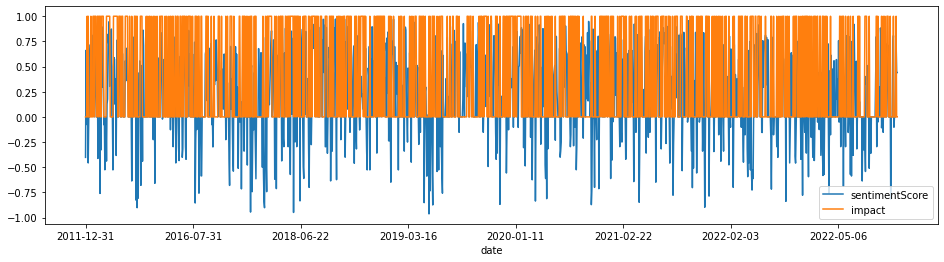

In [15]:
df_sentiment_percentage[["sentimentScore","impact"]].plot(figsize=(16,4))

In [16]:
#Lets see the scaled values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df_sentiment_percentage)),columns=["sentimentScore","likesCount","retweetCount","percentVol_1","percentVol_2","percentVol_3","impact"])

df_scaled.index = df_sentiment_percentage.index
df_scaled

,sentimentScore,likesCount,retweetCount,percentVol_1,percentVol_2,percentVol_3,impact
date,,,,,,,
2011-12-31,-1.480808,-0.308762,-0.294730,0.807383,2.052920,1.938152,-0.761934
2012-01-10,1.019217,-0.309354,-0.292628,-0.558077,-0.410569,5.550864,-0.761934
2012-01-12,-0.536041,-0.311328,-0.293589,8.627117,6.598494,0.787991,-0.761934
2012-01-17,-0.717519,-0.310354,-0.294069,-1.201226,-1.083777,-1.174253,1.312449
2012-01-17,-0.330350,-0.311321,-0.295811,-1.201226,-1.083777,-1.174253,-0.761934
...,...,...,...,...,...,...,...
2022-05-27,-0.536041,1.023654,0.869883,-0.554642,-0.707003,-0.223567,-0.761934
2022-05-31,-0.536041,-0.287414,-0.278092,0.002122,-0.621733,-0.655682,-0.761934
2022-05-31,1.210568,-0.231545,-0.223132,0.002122,-0.621733,-0.655682,1.312449


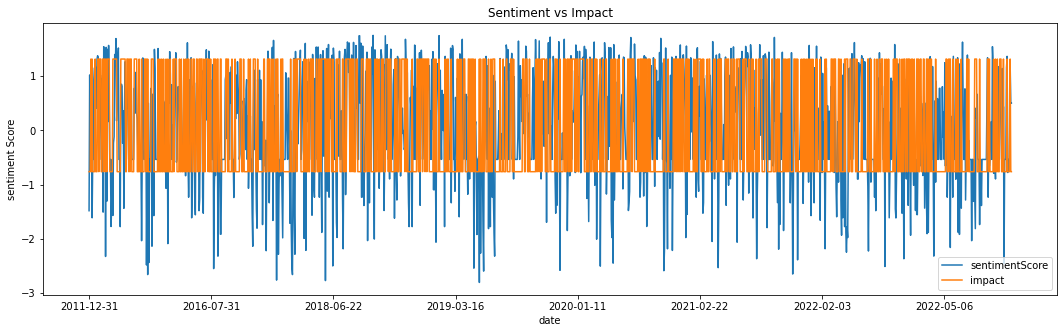

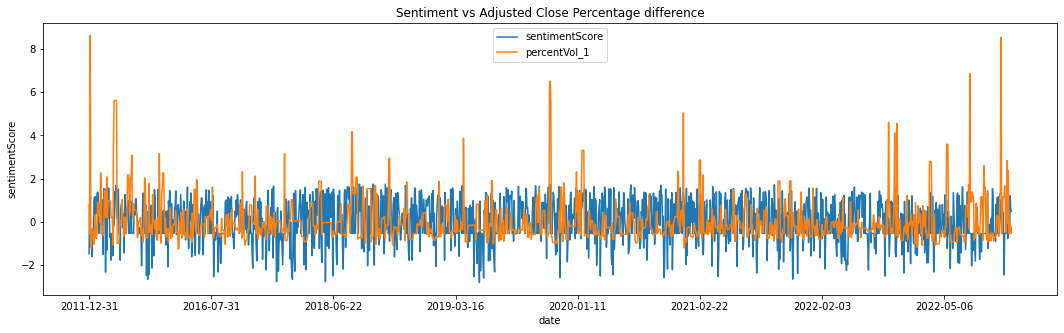

In [48]:
from matplotlib import style
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
fig1 = plt.figure(figsize=(40, 5))
fig2 = plt.figure(figsize=(40, 5))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig2.add_subplot(1,2,1)
df_scaled[["sentimentScore","impact"]].plot(ax=ax1)
df_scaled[["sentimentScore","percentVol_1"]].plot(ax=ax2)
ax1.set_ylabel('sentiment Score')
ax1.set_title('Sentiment vs Impact')

ax2.set_ylabel('sentimentScore')
ax2.set_title('Sentiment vs Adjusted Close Percentage difference')

plt.show()

# Train Split

In [18]:
X = df_sentiment_percentage[["sentimentScore","likesCount","retweetCount"]]

y = df_sentiment_percentage["impact"].values.reshape(-1,1)

In [19]:
SPLIT = int(0.6 * len(X))
X_train = X[:SPLIT]
X_test = X[SPLIT:]

y_train = y[:SPLIT]
y_test = y[SPLIT:]

In [20]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [22]:
rfc = RandomForestClassifier(n_estimators=128, random_state=78) 
rfc.fit(X_train, y_train)

C:\Users\15125\AppData\Local\Temp/ipykernel_27268/1859614513.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=128, random_state=78)

In [23]:
rfC_model = rfc.fit(X_train_scaled, y_train)

C:\Users\15125\AppData\Local\Temp/ipykernel_27268/340295679.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfC_model = rfc.fit(X_train_scaled, y_train)


In [24]:
predictions = rfC_model.predict(X_test_scaled)

In [25]:
# SAVE THE TRAINED MODEL
import pickle
filename = 'finalized_model.sav'
pickle.dump(rfC_model, open(filename, 'wb'))

In [26]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,276,130
Actual 1,90,109


In [27]:
acc_score = accuracy_score(y_test, predictions)
acc_score

0.6363636363636364

In [28]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,276,130
Actual 1,90,109


Accuracy Score : 0.6363636363636364
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.68      0.72       406
           1       0.46      0.55      0.50       199

    accuracy                           0.64       605
   macro avg       0.61      0.61      0.61       605
weighted avg       0.66      0.64      0.64       605



# Forecast if sentiment score will impact the prices ?

In [29]:
x_forecast_sentimentscore = np.array([-0.8])
x_forecast_likecount=np.array([23453])
x_forecast_retweetscore=np.array([94534])
x_forecast_date=["2022-07-27"]

In [30]:
x_F_retweetcount = pd.DataFrame(x_forecast_retweetscore,pd.to_datetime(x_forecast_date))
x_F_retweetcount

,0
2022-07-27,94534


In [31]:
x_forecast = pd.DataFrame(pd.concat([pd.DataFrame(x_forecast_sentimentscore,pd.to_datetime(x_forecast_date)),pd.DataFrame(x_forecast_likecount,pd.to_datetime(x_forecast_date)),pd.DataFrame(x_forecast_retweetscore,pd.to_datetime(x_forecast_date))],axis=1))

In [32]:
x_forecast.columns=["sentimentScore","likesCount","retweetCount"]

In [33]:
x_forecast

,sentimentScore,likesCount,retweetCount
2022-07-27,-0.8,23453,94534


In [34]:
X_value = X_scaler.transform(x_forecast) #Predict for give above inputs

In [35]:
forecast = rfC_model.predict(X_value)
forecast

array([1], dtype=int64)

In [36]:
x_forecast_sentimentscore = np.array([0.9])
x_forecast_likecount=np.array([3205])
x_forecast_retweetscore=np.array([5345])
x_forecast_date=["2022-07-27"]

In [37]:
x_F_retweetcount = pd.DataFrame(x_forecast_retweetscore,pd.to_datetime(x_forecast_date))
x_forecast = pd.DataFrame(pd.concat([pd.DataFrame(x_forecast_sentimentscore,pd.to_datetime(x_forecast_date)),pd.DataFrame(x_forecast_likecount,pd.to_datetime(x_forecast_date)),pd.DataFrame(x_forecast_retweetscore,pd.to_datetime(x_forecast_date))],axis=1))
x_forecast.columns=["sentimentScore","likesCount","retweetCount"]
x_forecast

,sentimentScore,likesCount,retweetCount
2022-07-27,0.9,3205,5345


In [38]:
X_value = X_scaler.transform(x_forecast) #Predict for give above inputs

In [39]:
forecast = rfC_model.predict(X_value)
forecast

array([1], dtype=int64)

# Using saved Model

In [40]:
loaded_model = pickle.load(open(filename, 'rb'))

In [41]:
forecast = loaded_model.predict(X_value)
forecast

array([1], dtype=int64)

In [42]:
#0.8   - 34234 - 333
#0.1  - 234234 -  434322,
#-0.9 - 332 - 5334
#-05  -  234323 - 434

x_forecast_sentimentscore = np.array([-0.5,0.1,-0.9,0.8])
x_forecast_likecount=np.array([234323,234234,332,34234])
x_forecast_retweetscore=np.array([434,434322,5334,333])
x_forecast_date=["2022-07-27","2022-07-28","2022-07-29","2022-07-30"]

In [43]:
x_forecast = pd.DataFrame(pd.concat([pd.DataFrame(x_forecast_sentimentscore,pd.to_datetime(x_forecast_date)),pd.DataFrame(x_forecast_likecount,pd.to_datetime(x_forecast_date)),pd.DataFrame(x_forecast_retweetscore,pd.to_datetime(x_forecast_date))],axis=1))

In [44]:
x_forecast.columns=["sentimentScore","likesCount","retweetCount"]
x_forecast

,sentimentScore,likesCount,retweetCount
2022-07-27,-0.5,234323,434
2022-07-28,0.1,234234,434322
2022-07-29,-0.9,332,5334
2022-07-30,0.8,34234,333


In [45]:
X_value = X_scaler.transform(x_forecast)

In [46]:
x_forecast["retweetCount"][0]

434

In [47]:
forecast = loaded_model.predict(X_value)
print("Sentiment Score | Likes Count | RetweetCount | Predict to have influence | Positive/Negative change expected")
print("------------------------------------------------------------------------------------------------------------")
impactString= ""
strYes =""
for i in range(0, len(forecast)):
    if forecast[i] > 0:
        strYes = 'Yes'
        if x_forecast["sentimentScore"][i] > 0:
            impactString = 'Price can go up'
        else: 
            impactString = 'Price can go down'
    else:
        strYes = 'No'
    print(str(x_forecast["sentimentScore"][i]).format() + "                " + str(x_forecast["likesCount"][i]) + "           " + str(x_forecast["retweetCount"][i]) + "                 " + strYes +  "                   " + impactString)
    impactString= ""
    strYes=""

Sentiment Score | Likes Count | RetweetCount | Predict to have influence | Positive/Negative change expected
------------------------------------------------------------------------------------------------------------
-0.5                234323           434                 No                   
0.1                234234           434322                 Yes                   Price can go up
-0.9                332           5334                 Yes                   Price can go down
0.8                34234           333                 No                   
